<span>
<b>Methods Workshop in Quantitative Text Analysis </b><br/>     
<b>Author:</b> <a href="https://github.com/jisukimmmm">Jisu Kim</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>Last update:</b> 21/03/2024
</span>

<a id='top'></a>
# *Introduction to Text pre-processing in Python*




## Table of Contents

1. [Build-in string manipulation functions](#mani)
2. [Lowercasing](#lower)
3. [Removing](#puct)
4. [Handling Contractions](#contract)
5. [Spell checking and correction](#spell)
6. [Tokenization](#token)
7. [Regular expressions](#re)
8. [Normalisation](#normal)
9. [Stemming](#stem)
10. [Lemmatisation](#lem)
11. [Part of Speach](#pos)
12. [Named Entity Recognition](#NER)
13. [Bag of Words](#bow)
14. [TF-IDF](#TFIDF)
15. [Word Embeddings](#embedding)
16. [N-grams](#ngrams)
17. [Text length and complexity](#text)
18. [Collocation and Terminology extraction](#colloc)

<a id='mani'></a>
## 1. Python's built-in string manipulation functionality ([to top](#mani))
>
Python's built-in string manipulation functionality and are very useful for a wide range of text processing tasks.

In [2]:
text = "Python is a powerful programming language. Python is popular for web development, data analysis, artificial intelligence, and more."
type(text)

str

Index of first instance of string 'Python' inside text using `.find()` (-1 if not found) 

In [3]:
index_first = text.find("Python")
print(f"First occurrence of 'Python': {index_first}")  # Output: 0

First occurrence of 'Python': 0


Index of last instance of string Python inside text using `.rfind` (-1 if not found)

In [4]:
index_last = text.rfind("Python")
print(f"Last occurrence of 'Python': {index_last}")  # Output: 46

Last occurrence of 'Python': 43


Like `text.find("Python")`, you can use `.index()` except it raises `ValueError` if not found

In [23]:
index_first_index = text.index("Python")
print(f"First occurrence of 'Python' using index: {index_first_index}")  # Output: 0

First occurrence of 'Python' using index: 0


Like `text.rfind("Python")`, you can use `.rindex()` except it raises ValueError if not found

In [24]:
index_last_index = text.rindex("Python")
print(f"Last occurrence of 'Python' using rindex: {index_last_index}")  # Output: 46

Last occurrence of 'Python' using rindex: 43


You can combine the words of the text using `.join()` into a string using `|` as the glue

In [25]:
separator = " | "
words = ["Python", "is", "fun"]
joined_text = separator.join(words)
print(f"Joined text: {joined_text}")  # Output: Python | is | fun

Joined text: Python | is | fun


Split text into a list using `.split()` wherever a Python is found (whitespace by default)

In [26]:
split_text = text.split(" ")
print(f"Split text by space: {split_text}")

Split text by space: ['Python', 'is', 'a', 'powerful', 'programming', 'language.', 'Python', 'is', 'popular', 'for', 'web', 'development,', 'data', 'analysis,', 'artificial', 'intelligence,', 'and', 'more.']


Split "Python" into a list of strings, one per line using `.splitlines()`

In [27]:
multi_line_text = "Python is powerful.\nPython is popular."
split_lines = multi_line_text.splitlines()
print(f"Split lines: {split_lines}")  # Output: ['Python is powerful.', 'Python is popular.']

Split lines: ['Python is powerful.', 'Python is popular.']


A titlecased version of the string using `.title()`

In [28]:
title_text = text.title()
print(f"Title cased text: {title_text}")

Title cased text: Python Is A Powerful Programming Language. Python Is Popular For Web Development, Data Analysis, Artificial Intelligence, And More.


A copy of text without leading or trailing whitespace using `.strip()`

In [5]:
padded_text = "   Python is great!   "
stripped_text = padded_text.strip()
print(f"Stripped text: '{stripped_text}'")  # Output: 'Python is great!'

Stripped text: 'Python is great!'


Replace instances of "Python" with "JavaScript" inside text using `.replace()`

In [30]:
replaced_text = text.replace("Python", "JavaScript")
print(f"Text with replacements: {replaced_text}")

Text with replacements: JavaScript is a powerful programming language. JavaScript is popular for web development, data analysis, artificial intelligence, and more.


<a id='lower'></a>
## 2. Lower and Upper case ([to top](#lower))
>

In text analysis, changing text to lower case is a common preprocessing step that helps standardize the data. Here are few reasons why we do this:
1.  <u>Normalization</u>: Text data often contains the same word in different cases (e.g., "Apple" vs. "apple"). Converting everything to lower case treats these variations as the same word, reducing redundancy and simplifying the analysis.
2. <u>Improved Matching</u>: Many text analysis tasks, such as searching, tokenization, and keyword extraction, rely on matching words accurately. Lowercasing ensures that "The", "the", and "THE" are recognized as the same word, improving consistency.
3. <u>Reducing Dimensionality</u>: Text data in natural language processing (NLP) can be very high-dimensional. Lowercasing helps reduce the number of unique tokens (words) in the corpus, which can improve the performance of machine learning models and make computations more efficient.
4. <u>Simplifying Models</u>: Many machine learning models, especially those involving bag-of-words or term frequency-inverse document frequency (TF-IDF) representations, perform better and are easier to interpret when case variations are eliminated.Avoiding Case Sensitivity Issues: Case sensitivity can introduce noise and inconsistencies in the data. For example, "usa", "USA", and "Usa" should generally be treated as the same entity in most text analysis contexts. Lowercasing helps to avoid these issues.

Overall, converting text to lower case is a straightforward and effective way to enhance the quality and consistency of text data, making subsequent analysis more robust and reliable.

In [5]:
# Sample text
text = "This is an Example Text with CAPITALIZED and lowercase words."

# Convert text to lowercase
lowercase_text = text.lower()

# Display lowercase text
print(lowercase_text)


this is an example text with capitalized and lowercase words.


In [7]:
# Convert text to uppercase
uppercase_text= text.upper()

# Display uppercase text
print(uppercase_text)

THIS IS AN EXAMPLE TEXT WITH CAPITALIZED AND LOWERCASE WORDS.


<a id='puct'></a>
## 3. Removing ([to top](#puct))
>

**Punctuation** such as commas, periods, exclamation marks, etc., can be removed from text using the `string.punctuation` module in Python. This step helps to focus on the essential content of the text.


In [6]:
import string

# Sample text with punctuation
text = "This text, contains punctuation! Can we remove it?"

# Remove punctuation
text_without_punctuation = text.translate(str.maketrans('', '', string.punctuation))

# Display text without punctuation
print(text_without_punctuation)

This text contains punctuation Can we remove it


**Stopwords** are common words (e.g., "the", "is", "and") that often do not carry significant meaning in text analysis. Removing stopwords helps to focus on the meaningful content of the text.

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Sample text
text = "This is a sample sentence with some stopwords that need to be removed."

# Tokenize text
words = word_tokenize(text)

# Remove stopwords
filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]

# Join filtered words back into a sentence
filtered_text = ' '.join(filtered_words)

# Display filtered text
print(filtered_text)

sample sentence stopwords need removed .


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


**Numbers and Special Characters** are any characters that are not letters or spaces from the text. This helps to eliminate noise and non-textual elements from the data.

In [8]:
import string

# Sample text with numbers and special characters
text = "This text contains 1234 numbers and @! special characters %^&*."

# Create translation table to remove digits and special characters
translation_table = str.maketrans('', '', string.digits + string.punctuation)

# Remove numbers and special characters
cleaned_text = text.translate(translation_table)

# Display cleaned text
print(cleaned_text)

This text contains  numbers and  special characters 


**whitespaces** : Strip extra whitespace characters (e.g., tabs, newlines) from the text.

In [36]:
# Sample text with extra whitespace
text = "    This   is    a   sample   text    with   extra   whitespace.     "

# Remove extra whitespace
cleaned_text = ' '.join(text.split())

# Display cleaned text
print(cleaned_text)


This is a sample text with extra whitespace.


<a id='contract'></a>
## 4. Handling contractions ([to top](#contract))
>
**Contractions** like "can't" and "it's" are expanded to their full forms ("cannot" and "it is") to ensure uniformity and consistency in the text data.

In [32]:
import contractions

# Sample text with contractions
text = "I can't wait to see you tomorrow. It's going to be fun!"

print(contractions.fix(text))

I cannot wait to see you tomorrow. It is going to be fun!


<a id='spell'></a>
## 5. Spell checking and correction ([to top](#spell))
>
Identify and rectify misspelled words.
In this example, we use the `pyspellchecker` library to correct misspelled words. Each word is corrected using the `SpellChecker` object. Finally, the corrected words are joined back into a sentence. There are several other packages and libraries in Python that offer spell checking. Here are some alternatives to the pyspellchecker library for spell checking:
>
>* `PyEnchant`
>* `Autocorrect`
>* `Hunspell`


In [39]:
# !pip install pyspellchecker

In [40]:
from spellchecker import SpellChecker

# Create a SpellChecker object
spell = SpellChecker()

# Sample text with misspelled words
text = "Ths is a smple text with misspeled wrds."

# Split the text into words
words = text.split()

# Find misspelled words
misspelled = spell.unknown(words)

# Correct misspelled words
for word in misspelled:
    # Get the corrected spelling
    corrected_word = spell.correction(word)
    # Replace misspelled word with corrected spelling
    text = text.replace(word, corrected_word)

# Display the corrected text
print(text)


Ths is a simple text with misspelled words


<a id='token'></a>
## 6. Tokenization ([to top](#token))
>
Breaking text into words, phrases, symbols, or other meaningful elements.


In [43]:
import nltk

# Sample text
text = "Tokenization is the process of splitting text into words and punctuation marks."

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Display the tokens
print(tokens)


['Tokenization', 'is', 'the', 'process', 'of', 'splitting', 'text', 'into', 'words', 'and', 'punctuation', 'marks', '.']


<a id='re'></a>
## 7. Regular expressions ([to top](#re))
>
The `re package in Python is a powerful library for working with regular expressions, which are sequences of characters that define search patterns, primarily used for string matching and manipulation. Here’s a comprehensive overview of the re package and its functionality:


`findall` Finds all occurrences of a pattern in the string and returns them as a list.

In [21]:
import re
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]', word)
#['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']
len(re.findall(r'[aeiou]', word))


16

`re.match()` Checks for a match only at the beginning of the string.

In [10]:
result = re.match(r'\d+', '123abc')
print(result.group())  


123


`re.search()` Searches the string for the first location where the regular expression pattern produces a match.

In [12]:
result = re.search(r'\d+', 'abc123def')
print(result.group())  # Output: 123


123


`re.finditer()` Returns an iterator yielding match objects for all non-overlapping matches of the pattern in the string.

In [24]:
result = re.finditer(r'\d+', 'abc123def456')
for match in result:
    print(match.group())  # Output: 123 then 456


123
456


`re.sub()` Replaces occurrences of the pattern in the string with a replacement string.

In [25]:
result = re.sub(r'\d+', '#', 'abc123def456')
print(result)  # Output: abc#def#


abc#def#


`re.split()` Splits the string by occurrences of the pattern.

In [27]:
result = re.split(r'\d+', 'abc123def456')
print(result)  # Output: ['abc', 'def', '']


['abc', 'def', '']


**Regular Expression SyntaxSpecial Characters**:

*`.`: Matches any character except a newline.

`^`: Matches the start of the string.

`$`: Matches the end of the string.

`*`: Matches 0 or more repetitions of the preceding pattern.

`+`: Matches 1 or more repetitions of the preceding pattern.

`?`: Matches 0 or 1 repetition of the preceding pattern.

`{m,n}`: Matches from m to n repetitions of the preceding pattern.

`[]`: Used to specify a character class.

`|`: Alternation (OR).

`()`: Grouping.

**Character Classes**:

`\d`: Matches any decimal digit; equivalent to the class `[0-9]`.

`\D`: Matches any non-digit character.

`\s`: Matches any whitespace character.

`\S`: Matches any non-whitespace character.

`\w`: Matches any alphanumeric character; equivalent to the class `[a-zA-Z0-9_]`.

`\W`: Matches any non-alphanumeric character.

**Escape Sequences**:

`\`: Escape special characters, e.g., `\\` for backslash, `\`. for period.

<a id='normal'></a>
## 8. Normalisation([to top](#normal))
>
The process of converting text into a standard or normalized form. This typically involves converting text to lowercase, removing accents or diacritics, and handling special characters or symbols in a consistent manner. 


In [44]:
# Sample text with mixed case
text = "This is a Sample Text with MIXED Case."

# Convert text to lowercase
normalized_text = text.lower()

# Display normalized text
print(normalized_text)


this is a sample text with mixed case.


<a id='stem'></a>
## 9. Stemming([to top](#stem))
>
A rule-based technique that removes suffixes from words to extract their root form, known as the stem.
There are several alternatives available in Python. Here are a few options:
>1. `TextBlob`: TextBlob is a simple library for processing textual data. It provides a TextBlob object that can perform various text processing tasks including stemming.
>2. `Snowball Stemmer`: The Snowball Stemmer (also known as the Porter2 or Porter2 Stemmer) is a stemming algorithm implemented in multiple languages, including Python. It's often used as an alternative to the Porter Stemmer.

In [45]:
from nltk.stem import PorterStemmer

# Create a PorterStemmer object
porter = PorterStemmer()

# Sample words
words = ["running", "runs", "ran", "runner", "easily"]

# Stem the words
stemmed_words = [porter.stem(word) for word in words]

# Display stemmed words
print(stemmed_words)


['run', 'run', 'ran', 'runner', 'easili']


<a id='lem'></a>
## 10. Lemmatization([to top](#lem))
>
It aims to reduce words to their base or dictionary form, known as the lemma. We can use `WordNetLemmatizer` to do this.

In [47]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...


True

In [48]:
from nltk.stem import WordNetLemmatizer

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Sample words
words = ["running", "runs", "ran", "runner", "easily"]

# Lemmatize the words
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# Display lemmatized words
print(lemmatized_words)


['running', 'run', 'ran', 'runner', 'easily']


<a id='pos'></a>
## 11. Part-of-Speech ([to top](#pos))
>
It involves assigning a specific part-of-speech tag to each word in a given text corpus, based on its syntactic role and context 
within the sentence
>E.g., `NNP`: Proper noun, singular
>`VBD`: Verb, past tense
>`VBG`: Verb, gerund or present participle
>`TO`: to
>`VB`: Verb, base form
>`RB`: Adverb
>`JJ`: Adjective
>`IN`: Preposition or subordinating conjunction
>`PRP$`: Possessive pronoun
>`NN`: Noun, singular or mass
>`DT`: Determiner
>`CC`: Conjunction, coordinating
>`PRP`: Personal pronoun
>`VBN`: Verb, past participle
>`WP`: Wh-pronoun, personal
>`VBZ`: Verb, 3rd person singular present 

In [50]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [54]:
import nltk
# Sample text
text = "NLTK is a leading platform for building Python programs to work with human language data."

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Perform POS tagging
pos_tags = nltk.pos_tag(words)

# Display the POS tags
print(pos_tags)


[('NLTK', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('leading', 'VBG'), ('platform', 'NN'), ('for', 'IN'), ('building', 'VBG'), ('Python', 'NNP'), ('programs', 'NNS'), ('to', 'TO'), ('work', 'VB'), ('with', 'IN'), ('human', 'JJ'), ('language', 'NN'), ('data', 'NNS'), ('.', '.')]


<a id='ner'></a>
## 12. Named Entity Recognition ([to top](#ner))
>
a technique used to identify and classify named entities within unstructured text into predefined categories such as names of persons, organizations, locations, dates, numerical expressions, and more. GPE stands for "Geopolitical Entity". GPE is a label used to identify geopolitical entities such as countries, cities, states, and territories.

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [65]:
import nltk

# Sample text with named entities
text = "Apple is headquartered in Cupertino, California, and was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne on April 1, 1976,"

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Perform POS tagging
pos_tags = nltk.pos_tag(words)

# Perform NER
chunks = nltk.ne_chunk(pos_tags)

# Extract named entities
named_entities = []
for chunk in chunks:
    if hasattr(chunk, 'label'):
        named_entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))

# Display named entities
print(named_entities)


[('GPE', 'Apple'), ('GPE', 'Cupertino'), ('GPE', 'California'), ('PERSON', 'Steve Jobs'), ('PERSON', 'Steve Wozniak'), ('PERSON', 'Ronald Wayne')]


<a id='bow'></a>
## 13. Bag of Words ([to top](#bow))
>
BoW represents text data as a matrix where each row corresponds to a document and each column corresponds to a unique word in the corpus. The values in the matrix indicate the frequency of each word in the document. This approach disregards word order and grammar but captures the occurrence of words in documents.

In [73]:
# !pip install scikit-learn

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the documents into a BoW representation
bow_matrix = vectorizer.fit_transform(documents)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Display the BoW representation
print(bow_matrix.toarray())
print("Feature Names:", feature_names)


[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


<a id='TFIDF'></a>
## 14. Term Frequency-Inverse Document Frequency ([to top](#TFIDF))
>
TF-IDF calculates the importance of a word in a document relative to a corpus of documents. It assigns higher weights to words that are frequent in a document but rare in other documents. TF-IDF is useful for identifying keywords and reducing the importance of common words like "the" and "is".

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents into a TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Display the TF-IDF representation
print(tfidf_matrix.toarray())
print("Feature Names:", tfidf_vectorizer.get_feature_names_out())


[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


<a id='embedding'></a>
## 15. Word embeddings  ([to top](#embedding))
>
Word embeddings represent words as dense vector representations in a continuous vector space. It learns distributed representations of words based on their context in a large corpus of text. Word embeddings capture semantic relationships between words and are useful for tasks like semantic similarity and text classification.
>
>The following script demonstrates the use of Word2Vec models to calculate the cosine similarity between words in a given text corpus. Word2Vec is a popular technique in natural language processing (NLP) used to represent words as dense vectors in a continuous vector space. By training Word2Vec models on a corpus of text data, we can capture semantic relationships between words and measure their similarity.
>
>In this script, we utilize Skip Gram architecture. We tokenize a mock text corpus using the nltk library and then train the Word2Vec models on the tokenized data. In Word2Vec, setting sg=1 indicates that the Skip-gram model should be used for training. If sg were set to 0 (sg=0), it would indicate that the Continuous Bag of Words (CBOW) model should be used instead.

In [6]:
# !pip install scipy==1.12  #Make sure to restart the notebook

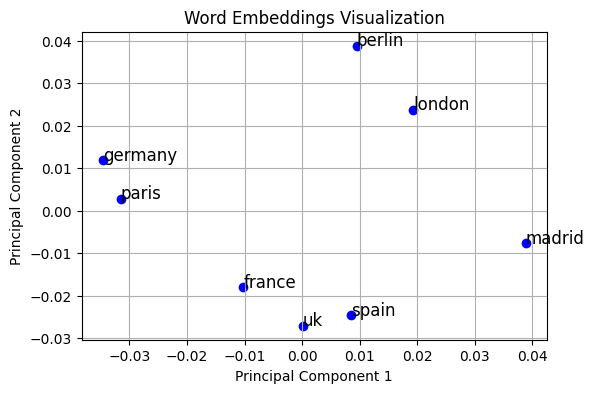

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

# Example corpus of cities and countries
corpus = [
    ['paris', 'france', 'london', 'uk'],
    ['london', 'uk', 'berlin', 'germany'],
    ['berlin', 'germany', 'madrid', 'spain']
]

# Train Word2Vec model
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, sg=1)

# Get word vectors
word_vectors = model.wv

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors.vectors)

# Visualize word embeddings
plt.figure(figsize=(6, 4))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', c='b')

# Annotate points with words
for i, word in enumerate(word_vectors.index_to_key):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Word Embeddings Visualization')
plt.grid(True)
plt.show()


The relative positions of words in the visualization are based on the learned semantic relationships between them. While "Germany" and "Paris" are not directly related geographically, they may have occurred in similar contexts within the corpus. The fact that "Germany" and "Paris" appear close in the visualization, it suggests that the model has learned some semantic association or similarity between them based on their co-occurrences with other words in the corpus.

<a id='ngrams'></a>
## 16. N-grams ([to top](#ngrams))
>
N-grams are sequences of N consecutive words in a document. Unigrams (N=1) represent single words, bigrams (N=2) represent pairs of adjacent words, and trigrams (N=3) represent triplets of adjacent words. N-grams capture local word patterns and can provide additional context for text analysis tasks.

In [81]:
from nltk.util import ngrams

# Sample text
text = "This is a sample text for generating n-grams."

# Tokenize the text into words
words = text.split()

# Generate bi-grams
bi_grams = list(ngrams(words, 2))

# Generate tri-grams
tri_grams = list(ngrams(words, 3))

# Display bi-grams and tri-grams
print("Bi-grams:", bi_grams)
print("Tri-grams:", tri_grams)


Bi-grams: [('This', 'is'), ('is', 'a'), ('a', 'sample'), ('sample', 'text'), ('text', 'for'), ('for', 'generating'), ('generating', 'n-grams.')]
Tri-grams: [('This', 'is', 'a'), ('is', 'a', 'sample'), ('a', 'sample', 'text'), ('sample', 'text', 'for'), ('text', 'for', 'generating'), ('for', 'generating', 'n-grams.')]


<a id='text'></a>
## 17. Text Length and Complexity ([to top](#text))
>
Features such as the length of the text, average word length, and vocabulary richness (number of unique words) can provide insights into the complexity and style of the text. These features can be useful for tasks like readability assessment and authorship attribution.

In [82]:
# Sample text
text = "This is a sample text for measuring text length and complexity."

# Measure text length
text_length = len(text)

# Measure average word length
words = text.split()
average_word_length = sum(len(word) for word in words) / len(words)

# Display text length and average word length
print("Text Length:", text_length)
print("Average Word Length:", average_word_length)


Text Length: 63
Average Word Length: 4.818181818181818


<a id='colloc'></a>
## 18. Collocation and Terminology Extraction ([to top](#colloc))
>
Collocations are pairs or groups of words that often co-occur together in a text. They carry a specific meaning and are commonly used in language.

In [83]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Sample text
text = "This is a sample text for collocation extraction."

# Tokenize the text into words
words = text.split()

# Create a BigramCollocationFinder object
finder = BigramCollocationFinder.from_words(words)

# Score collocations using Pointwise Mutual Information (PMI)
scored_collocations = finder.score_ngrams(BigramAssocMeasures.pmi)

# Display top collocations
print("Top Collocations:", scored_collocations)


Top Collocations: [(('This', 'is'), 3.0), (('a', 'sample'), 3.0), (('collocation', 'extraction.'), 3.0), (('for', 'collocation'), 3.0), (('is', 'a'), 3.0), (('sample', 'text'), 3.0), (('text', 'for'), 3.0)]
